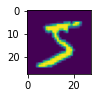

5


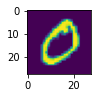

0


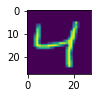

4


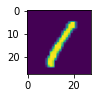

1


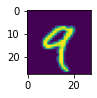

9


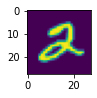

2


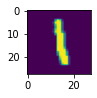

1


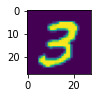

3


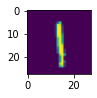

1


In [4]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical, load_img, img_to_array
from keras.models import Sequential
from keras.layers import Conv2D,Activation, Dropout,MaxPooling2D, Flatten, Dense
import numpy as np
import pandas as pd

(x_train, y_train),(x_test,y_test) = mnist.load_data()
x = x_test

for i in range(9):
  plt.subplot(330+i+1)
  plt.imshow(x_train[i])
  plt.show()
  print(y_train[i])

In [5]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [6]:
# MODEL CNN
from keras.models import Sequential
from keras.layers import Conv2D,Activation, Dropout,MaxPooling2D

model = Sequential()
# BLOCK 1
model.add(Conv2D(28,(3,3), activation='relu',kernel_initializer = 'he_uniform', padding ='same' ,input_shape =(28,28,1)))
model.add(Conv2D(28,(3,3), activation='relu',kernel_initializer = 'he_uniform', padding ='same'))
model.add(MaxPooling2D(2,2))

# BLOCK 2
model.add(Conv2D(56,(3,3), activation='relu',kernel_initializer = 'he_uniform', padding ='same'))
model.add(Conv2D(56,(3,3), activation='relu',kernel_initializer = 'he_uniform', padding ='same'))
model.add(MaxPooling2D(2,2))

# BLOCK 3
model.add(Conv2D(112,(3,3), activation='relu',kernel_initializer = 'he_uniform', padding ='same'))
model.add(Conv2D(112,(3,3), activation='relu',kernel_initializer = 'he_uniform', padding ='same'))
model.add(MaxPooling2D(2,2))

#output
model.add(Flatten())
model.add(Dense(112, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(112, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

In [9]:
from tensorflow.keras.optimizers import SGD

opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
history = model.fit(x_train,y_train, batch_size=64, epochs=50, verbose=1, validation_data=(x_test,y_test))

Epoch 1/50
938/938 [==============================] - 16s 16ms/step - loss: 0.0369 - accuracy: 0.9886 - val_loss: 0.0273 - val_accuracy: 0.9920
Epoch 2/50
938/938 [==============================] - 15s 16ms/step - loss: 0.0243 - accuracy: 0.9923 - val_loss: 0.0292 - val_accuracy: 0.9906
Epoch 3/50
938/938 [==============================] - 18s 19ms/step - loss: 0.0166 - accuracy: 0.9948 - val_loss: 0.0228 - val_accuracy: 0.9927
Epoch 4/50
938/938 [==============================] - 15s 16ms/step - loss: 0.0126 - accuracy: 0.9959 - val_loss: 0.0226 - val_accuracy: 0.9934
Epoch 5/50
938/938 [==============================] - 18s 19ms/step - loss: 0.0092 - accuracy: 0.9968 - val_loss: 0.0245 - val_accuracy: 0.9935
Epoch 6/50
938/938 [==============================] - 15s 16ms/step - loss: 0.0071 - accuracy: 0.9976 - val_loss: 0.0238 - val_accuracy: 0.9923
Epoch 7/50
938/938 [==============================] - 15s 16ms/step - loss: 0.0061 - accuracy: 0.9980 - val_loss: 0.0258 - val_accuracy:

In [11]:
model.save('mnist_CNN.h5')

In [12]:
from keras.models import load_model
models = load_model('mnist_CNN.h5')

In [13]:
score = model.evaluate(x_test, y_test,verbose=1)
print('Test loss= ', score[0])
print('Test accuracy= ', score[1])

313/313 [==============================] - 2s 7ms/step - loss: 0.0327 - accuracy: 0.9944
Test loss=  0.03271263465285301
Test accuracy=  0.9944000244140625


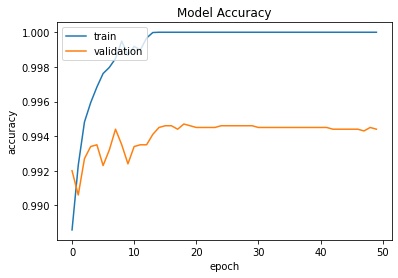

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='upper left')

In [15]:
y_predict = model.predict(x_test)

# Tạo một index và dự đoán 
random_index = np.random.choice(len(x_test))
x_sample = x_test[random_index]
y_true = np.argmax(y_test, axis = 1)
y_sample_true = y_true[random_index]
y_sample_classes = y_predict[random_index]

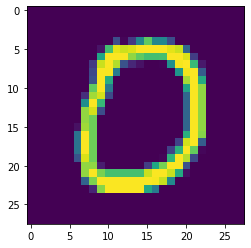

0


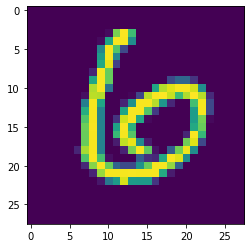

6


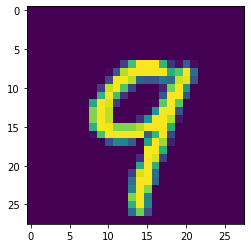

9


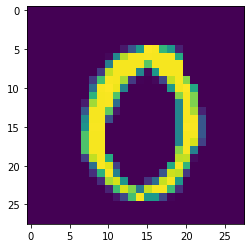

0


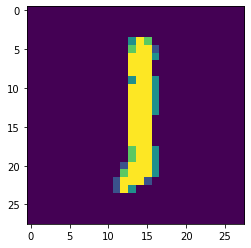

1


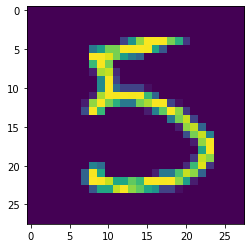

5


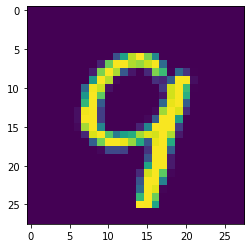

9


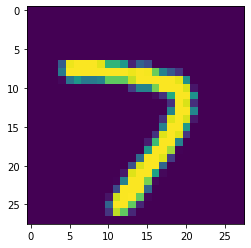

7


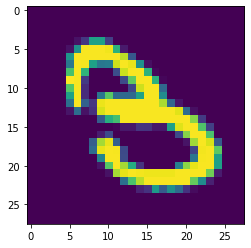

3


In [16]:
for i in range(9):
    plt.imshow(x[10+i])
    plt.show()
    print(np.argmax(np.round(y_predict[10+i])))